# Section D. Ridge Regression



 ## Ridge Regression (Question 5)
 - Student Name: Akshay Sapra 
 - Stuident ID: 29858186
 
Programming Language used: R in Jupyter Notebook

Libraries Used: 
- reshape2 - to reshape the data
- ggplot2 - to plot visualisation




### Steps for the solution
<ol>
	<li>Load the Train and test dataset provided as part of the assignment specification,</li>
    <li>Define the SGD and BGD function,</li>
       <li>Implement the SGD and BGD by keeping terminition criteria of maximum of 18 weight updates for
BGD, also equivalent to 18 x N weight updates for SGD,</li>
	<li>Report the error and fluctuations in the trend.</li>
	
</ol>

### Libraries Used

In [94]:
library(reshape2)
library(ggplot2)

### Load And Explore Data

In [36]:
## reading the data
dtrain = read.csv("Task1C_train.csv", TRUE)
dtest = read.csv("Task1C_test.csv", TRUE)

In [37]:
# Checking first few rows 
head(dtrain)

x1,x2,x3,x4,y
1991.496,1628.75,1678.1,1772.8,2443.6
1991.504,1606.51,1678.6,1718.0,2448.2
1991.512,1618.16,1686.6,1723.1,2484.7
1991.519,1630.75,1682.9,1734.5,2487.9
1991.527,1635.47,1697.5,1754.0,2510.5
1991.535,1647.84,1723.8,1759.8,2532.5


In [38]:
# Checking first few rows 
head(dtest)

x1,x2,x3,x4,y
1991.500,1613.63,1688.5,1750.5,2460.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.515,1610.61,1671.6,1714.3,2466.8
1991.523,1640.17,1703.6,1757.4,2508.4
1991.531,1645.89,1716.3,1754.3,2497.4
1991.538,1638.35,1730.5,1755.5,2556.8


In [39]:
# Checking the dimensions of Train and Test data
dim (dtrain)
dim (dtest)

[1] 930   5

[1] 930   5

#### Task 1 

Given the gradient descent algorithms for linear regression (discussed in
Chapter 2 of Module 2), derive weight update steps of stochastic gradient
descent (SGD) as well as batch gradient descent (BGD) for linear
regression with L2 regularisation norm. Show your work with enough
explanation in your PDF report; you should provide the steps of SGD and
BGD, separately

** Please check the report for the solution**

#### Task II

Using R (with no use of special libraries), implement SGD and BGD
algorithms that you derived in Step I. The implementation is
straightforward as you are allowed to use the code examples provided

### Implementing SGD and BGD

#### Auxilary Functions

In [40]:
# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w){
    return(Phi%*%w)
} 

# reading the data
read_data <- function(fname, sc) {
   data <- read.csv(file=fname,head=TRUE,sep=",")
   nr = dim(data)[1]
   nc = dim(data)[2]
   x = data[1:nr,1:(nc-1)]
   y = data[1:nr,nc]
   if (isTRUE(sc)) {
      x = scale(x)
      y = scale(y)
   }
   return (list("x" = x, "y" = y))
}

# auxiliary function to calculate the objective function for the training
train_obj_func <- function (Phi, w, label, lambda){
    # the L2 regulariser is already included in the objective function for training 
    return(mean((predict_func(Phi, w) - label)^2) + .5 * lambda * w %*% w)
}


# auxiliary function to compute the error of the model
get_errors <- function(train_data, test_data, W) {
   n_weights = dim(W)[1]
   errors = matrix(,nrow=n_weights, ncol=2)
   for (tau in 1:n_weights) {
      errors[tau,1] = train_obj_func(train_data$x, W[tau,],train_data$y, 0)
      errors[tau,2] = train_obj_func(test_data$x, W[tau,],test_data$y, 0)
   }
   return(errors)
}

# updating the weight vector
sgd_update_weight <- function(W_prev, x, y_true, y_pred, lambda, eta) {
   # MODIFIED THIS FUNCTION FOR L2 REG
   grad = - (y_true-y_pred) * x 
   return(W_prev - eta * (grad+lambda*W_prev))
}

# updating the weight vector for BGD
bgd_update_weight <- function(W_prev, x, y_true, y_pred, lambda, eta) {
   # MODIFY THIS FUNCTION FOr L2 REG
   grad = -colMeans(matrix((y_true-y_pred),nrow=dim(x)[1],ncol=dim(x)[2]) * x)
   return (W_prev - eta * (grad+lambda*W_prev))
}


#### SGD Implementation

In [41]:
##--- Stochastic Gradient Descent --------------------------------------------
sgd_train <- function(train_x, train_y, lambda, eta, epsilon, max_epoch) {

   train_len = dim(train_x)[1]
   tau_max = max_epoch * train_len

   W <- matrix(,nrow=tau_max, ncol=ncol(train_x)) 
   W[1,] <- runif(ncol(train_x))
  
   tau = 1 # counter 
   obj_func_val <-matrix(,nrow=tau_max, ncol=1) 
   obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)

   while (tau <= tau_max){

       # check termination criteria
       if (obj_func_val[tau,1]<=epsilon) {break}
 
       # shuffle data:
       train_index <- sample(1:train_len, train_len, replace = FALSE)
    
       # loop over each datapoint
       for (i in train_index) {
           # increment the counter
           tau <- tau + 1
           if (tau > tau_max) {break}

           # make the weight update
           y_pred <- predict_func(train_x[i,], W[tau-1,])
           W[tau,] <- sgd_update_weight(W[tau-1,], train_x[i,], train_y[i], y_pred, lambda, eta)

           # keep track of the objective funtion
           obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)

       }
   }
   # resulting values for the training objective function as well as the weights
   return(list('vals'=obj_func_val,'W'=W))
}

play_with_sgd <- function() {
   ## reading the data
   dtrain = read_data("Task1C_train.csv", TRUE)
   dtest = read_data("Task1C_test.csv", TRUE)
 
   ##### SGD Trainng
   max_epoch = 18
   epsilon = .001
   eta = .01
   lambda=0.0001

   train_res = sgd_train(dtrain$x, dtrain$y, lambda, eta, epsilon, max_epoch)
   SGD.errors <<- get_errors(dtrain, dtest, train_res$W) 

   plot(train_res$val, main="SGD", type="l", col="blue", ylim=c(0,.1), xlab="iteration", ylab="training objective function")
   plot(SGD.errors[1:500,1], type="l", col="blue",ylim=c(0,1), xlab="iteration", ylab="error")
   lines(SGD.errors[1:500,2], type="l", lty=2, lwd=2, col="red")
}




#### BGD Implementation

In [42]:

##--- Batch Gradient Descent --------------------------------------------
bgd_train <- function(train_x, train_y, lambda, eta, epsilon, max_epoch) {

   train_len = dim(train_x)[1]

   W <- matrix(,nrow=(max_epoch+1), ncol=ncol(train_x))
   W[1,] <- runif(ncol(train_x))

   tau = 1 # counter 
   obj_func_val <-matrix(,nrow=(max_epoch+1), ncol=1)
   obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)

   trainin_size = dim(train_x)[1]
   for (tau in 1:max_epoch){

       # check termination criteria
       if (obj_func_val[tau,1]<=epsilon) {break}

       # make prediction over the training set
       y_pred = train_x %*% W[tau,]

       # update the weight you may decide to chose linea search or not (we are not using line search here)
       W[tau+1,] = bgd_update_weight(W[tau,], train_x, train_y, y_pred, lambda, eta)

       # keep track of the objective funtion
       obj_func_val[tau+1,1] = train_obj_func(train_x, W[tau+1,],train_y, lambda)
   } 
   # resulting values for the training objective function as well as the weights
   return(list('vals'=obj_func_val,'W'=W))
}


##------------------------------------------------------------------------

play_with_bgd <- function() {
   ## reading the data
   dtrain = read_data("Task1C_train.csv", TRUE)
   dtest = read_data("Task1C_test.csv", TRUE)

   ##### BGD Training
   max_epoch = 18
   epsilon = .001
   eta = .01
   lambda=0.0001

   train_res = bgd_train(dtrain$x, dtrain$y, lambda, eta, epsilon, max_epoch)
   BGD.errors <<- get_errors(dtrain, dtest, train_res$W)
   plot(train_res$val, main="BGD", type="l", col="blue", xlab="iteration", ylab="training objective function")
   plot(BGD.errors[,1], type="l", col="blue",ylim=c(0,1), xlab="iteration", ylab="error")
   lines(BGD.errors[,2], type="l", lty=2, lwd=2, col="red")
}

##############################################################


options(warn = -1)



#### Task III

Now let’s compare SGD and BGD implementations of ridge regression
from Step II:


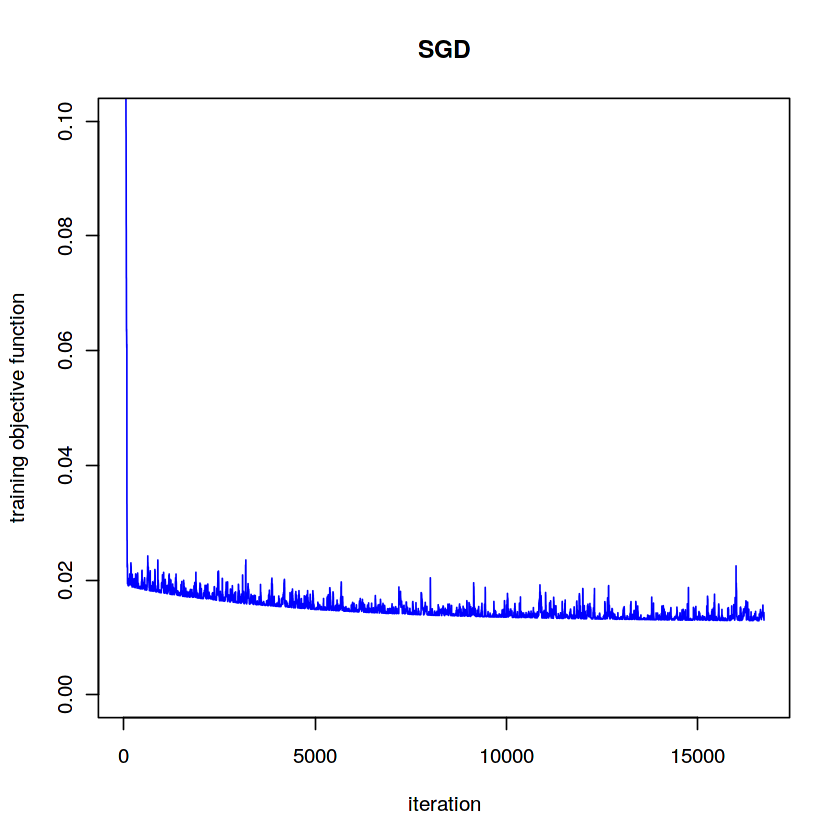

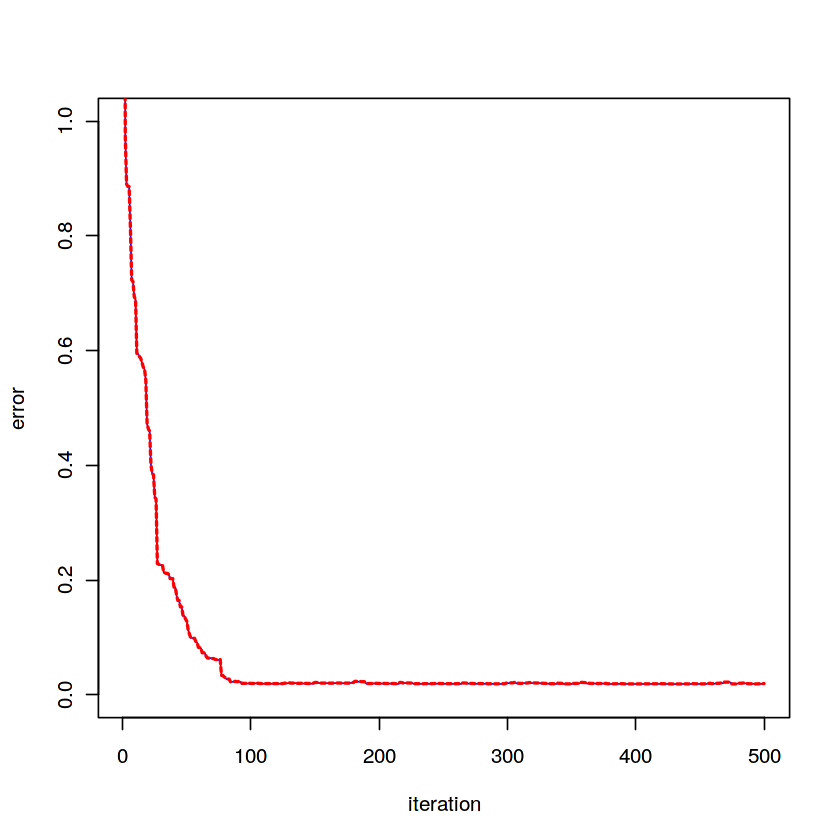

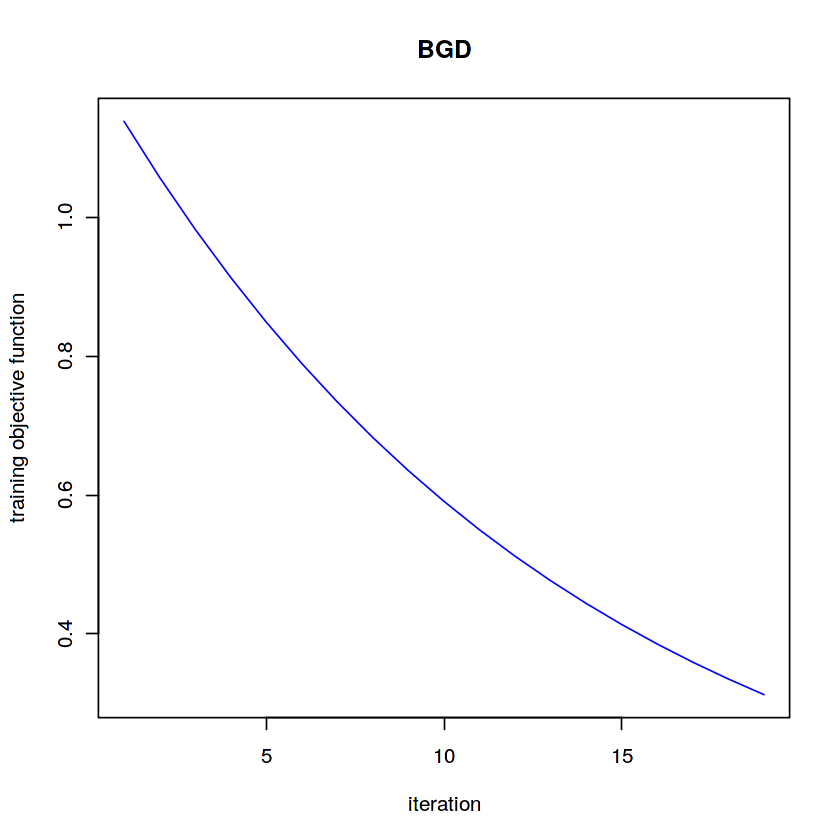

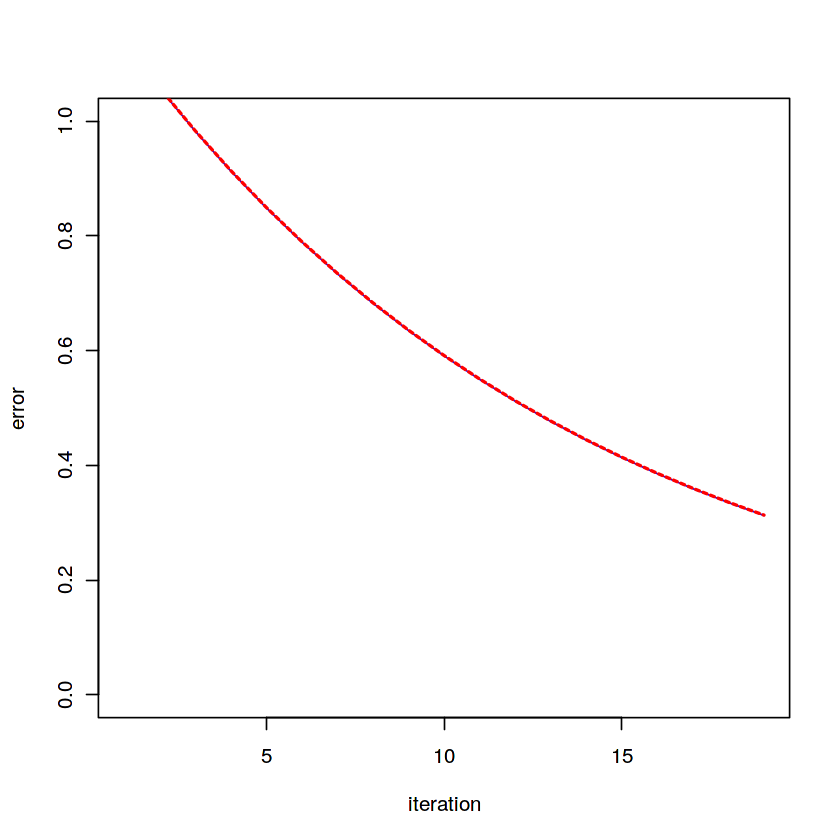

In [44]:
#Individual graphs for SGD and BGD
play_with_sgd()
play_with_bgd()

In [45]:
# As mentioned the total length of the x-axis will be 18x N therefore First row is removed from bgd.error
BGD.errors <- BGD.errors [-1,1]
BGD.errors <-rep(BGD.errors,each=nrow(SGD.errors)/18)

error.frame <- data.frame ('iterations' = 1:nrow(SGD.errors),'BGD'=BGD.errors, 'SGD'=SGD.errors[,1])


In [95]:
#REshaping the data
error.m=melt(error.frame, id=c('iterations'))

#### Plotting graph for comparison

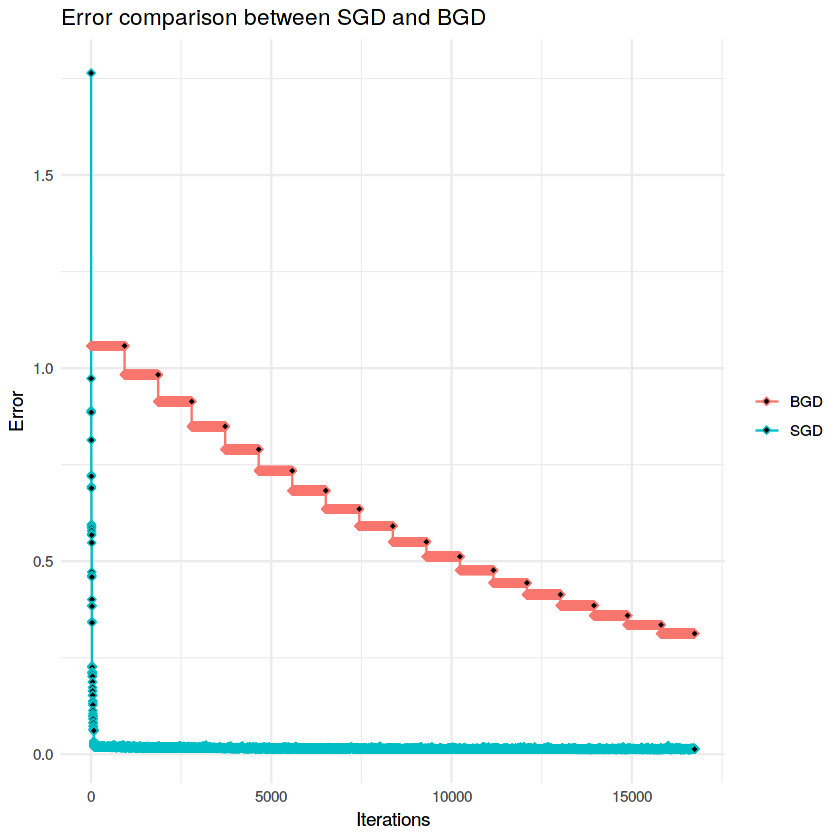

In [100]:
#Note that for every N errors for SGD in the plot, you will only have one error for BGD; the total length of the x-axis will be 18x N.
ggplot(data=error.m, aes(x=iterations, y=value, color=variable)) + geom_line() + geom_point(shape=23, fill='black')+
  scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
  ggtitle("Error comparison between SGD and BGD")+ylab("Error")+xlab("Iterations")

**Observations**
- It is evident from the graph that conversgence speed is much faster and quicker for SGD when compared to BGD
- Although not completely visible from this graph but SGD fluctuates around it's global minima